In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
X = pd.read_csv("linearX.csv").values
y = pd.read_csv("linearY.csv").values

In [6]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

Data normalizing

In [7]:
# Normalize features (Standardization: Mean = 0, Std Dev = 1)
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std

y_mean = np.mean(y)
y_std = np.std(y)
y = (y - y_mean) / y_std


predictor normalization

In [8]:
# Normalize predictor (X) using Z-score normalization
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std

In [9]:
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    m = len(y)  # Number of training examples
    theta_0, theta_1 = 0, 0  # Initial parameters
    cost_history = []
    for iteration in range(num_iterations):
        # Hypothesis
        predictions = theta_0 + theta_1 * X
        errors = predictions - y

        # Cost function
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)

        # Gradients
        gradient_theta_0 = (1 / m) * np.sum(errors)
        gradient_theta_1 = (1 / m) * np.sum(errors * X)

        # Update parameters
        theta_0 -= learning_rate * gradient_theta_0
        theta_1 -= learning_rate * gradient_theta_1

    return theta_0, theta_1, cost_history

Training the Model

In [10]:
theta_0, theta_1, cost_history = gradient_descent(X, y, learning_rate=0.5, num_iterations=2000)

plotting

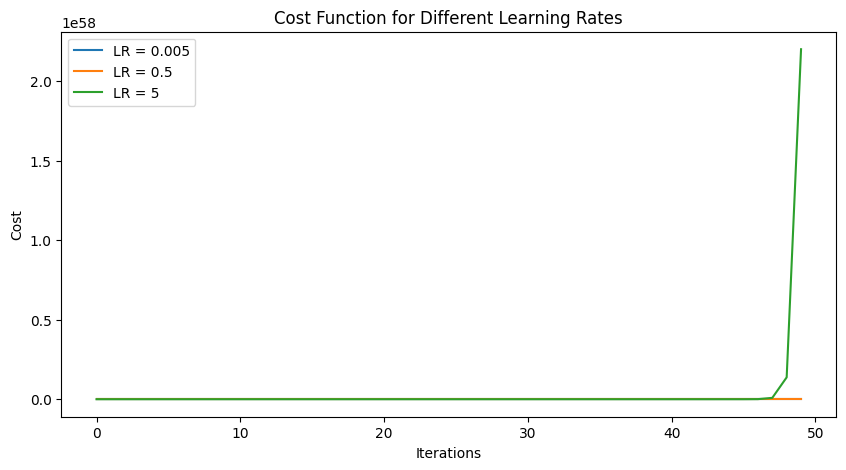

In [11]:
learning_rates = [0.005, 0.5, 5]

plt.figure(figsize=(10, 5))

for lr in learning_rates:
    _, _, cost_hist = gradient_descent(X, y, learning_rate=lr, num_iterations=50)
    plt.plot(range(50), cost_hist[:50], label=f"LR = {lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.title("Cost Function for Different Learning Rates")
plt.show()


final parameters

In [12]:
# Print final values
print(f"Final Theta_0: {theta_0}")
print(f"Final Theta_1: {theta_1}")
print(f"Final Cost Function Value: {cost_history[-1]}")

Final Theta_0: -2.1774108890786064e-15
Final Theta_1: 0.661955470994228
Final Cost Function Value: 0.28090747721040477
